# Demo

## Classifier

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
np.random.seed(2)
rng = np.random.default_rng()

# Generate an array of multiple ordered pairs
num_pairs = 7500
ordered_pairs_array = rng.uniform(low=-1.0, high=1.0, size=(num_pairs, 2))

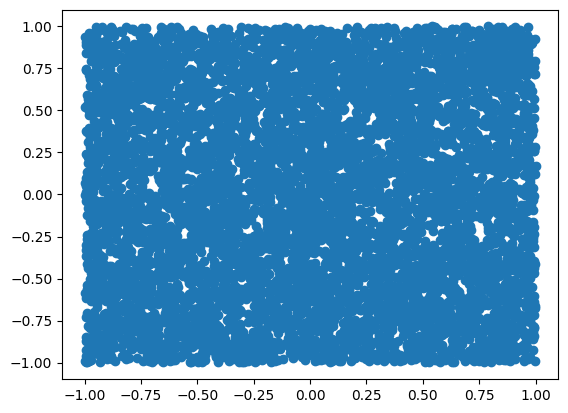

In [20]:
plt.scatter(ordered_pairs_array[:,0],ordered_pairs_array[:,1])
plt.show()

In [21]:
df = pd.DataFrame(ordered_pairs_array)

In [22]:
df.head()

,0,1
0,0.626426,-0.456144
1,0.211737,-0.526421
2,-0.845099,0.582968
3,-0.335661,-0.904442
4,-0.778125,0.971183


In [23]:
df.columns = ["t","x"]

In [24]:
df.head()

,t,x
0,0.626426,-0.456144
1,0.211737,-0.526421
2,-0.845099,0.582968
3,-0.335661,-0.904442
4,-0.778125,0.971183


In [25]:
df["class"] = df["x"] >= np.sin(2*np.pi*df["t"])

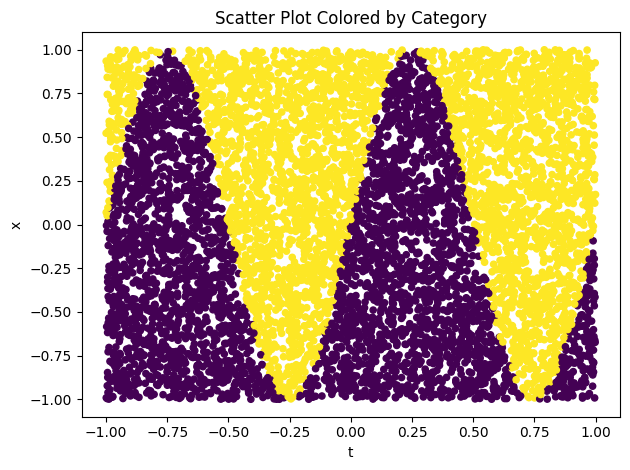

In [26]:
# color_map = {True: 'blue', False: 'red'}
# df['color'] = df['class'].map(color_map)

# Plot the scatter plot, coloring by the 'Color' column
df.plot(x='t', y='x', kind='scatter', color=df['class'])
plt.title('Scatter Plot Colored by Category')
plt.tight_layout()
plt.show()

In [27]:
df.head()

,t,x,class
0,0.626426,-0.456144,True
1,0.211737,-0.526421,False
2,-0.845099,0.582968,False
3,-0.335661,-0.904442,False
4,-0.778125,0.971183,False


In [28]:
df.to_csv('data/sin_class.csv',index=False)

### Testing

In [54]:
df_test = pd.read_pickle("data/scott-atkinson_20250724_ugZK/X_test_scott-atkinson_20250724_ugZK.pkl")
y_hat_file = 'data/scott-atkinson_20250724_ugZK/y_hat_scott-atkinson_20250724_ugZK.npy'
y_hat = np.load(y_hat_file)
df_test["y_hat"] = y_hat
df_test.head()

,t,x,y_hat
0,0.626426,-0.456144,0.652332
1,0.211737,-0.526421,0.000308
10,-0.956160,-0.248917,0.002932
16,0.024947,0.315055,0.880751
19,-0.949019,-0.549660,0.001012


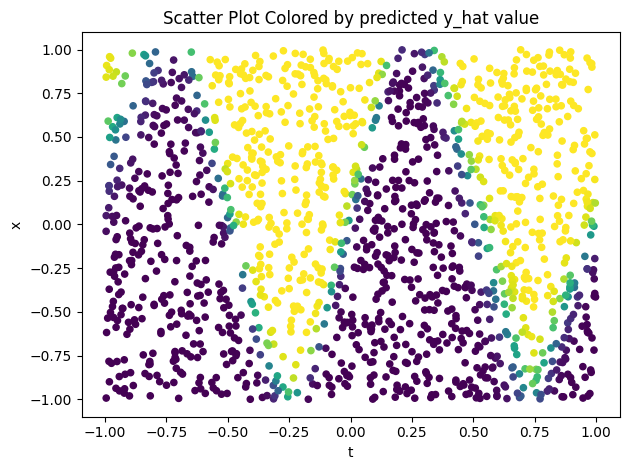

In [55]:
df_test.plot(x='t', y='x', kind='scatter', color=df_test['y_hat'])
plt.title('Scatter Plot Colored by predicted y_hat value')
plt.tight_layout()
plt.show()

## Regression Data (poly function)

In [46]:
x = np.array([np.linspace(-2+i,2+i, 5000) for i in range(5)])
y = x[0] + x[1]**2 + x[2]**3 + x[3]**4 + x[4]**5
y += np.random.normal(0,0.1,5000)
arr = np.array([xi for xi in x] + [y])

In [47]:
df2 = pd.DataFrame(arr.T)

In [48]:
df2.head()

,0,1,2,3,4,5
0,-2.000000,-1.000000,0.000000,1.000000,2.000000,32.216119
1,-1.999200,-0.999200,0.000800,1.000800,2.000800,32.200551
2,-1.998400,-0.998400,0.001600,1.001600,2.001600,32.024269
3,-1.997600,-0.997600,0.002400,1.002400,2.002400,32.234697
4,-1.996799,-0.996799,0.003201,1.003201,2.003201,32.273238


In [49]:
df2.columns = ["x1","x2","x3","x4","x5","y"]

In [50]:
df2.to_csv("data/poly_reg.csv", index=False)

### Testing

In [61]:
df2_test = pd.read_pickle("data/scott-atkinson_20250724_xr8z/X_test_scott-atkinson_20250724_xr8z.pkl")
y_hat_file = 'data/scott-atkinson_20250724_xr8z/y_hat_scott-atkinson_20250724_xr8z.npy'
y_hat = np.load(y_hat_file)
df2_test["y_hat"] = y_hat
df2_test.head()

,x1,x2,x3,x4,x5,y_hat
0,-2.000000,-1.000000,0.000000,1.000000,2.000000,-0.893058
1,-1.999200,-0.999200,0.000800,1.000800,2.000800,-0.893000
10,-1.991998,-0.991998,0.008002,1.008002,2.008002,-0.892477
16,-1.987197,-0.987197,0.012803,1.012803,2.012803,-0.892129
19,-1.984797,-0.984797,0.015203,1.015203,2.015203,-0.891954


In [62]:
df2_test = df2_test.merge(df2[["y"]], left_index=True, right_index=True)

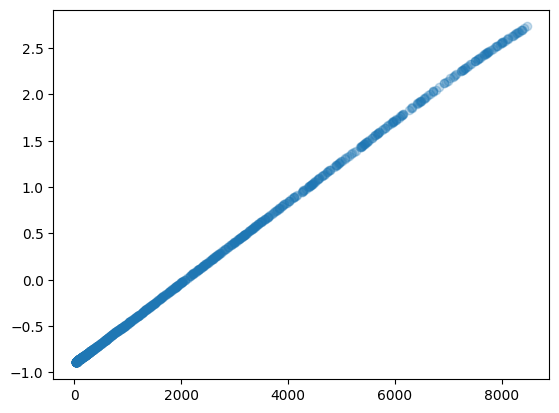

In [63]:
plt.scatter(df2_test["y"],df2_test["y_hat"], alpha=0.25)

## Regression Data (exp sin)

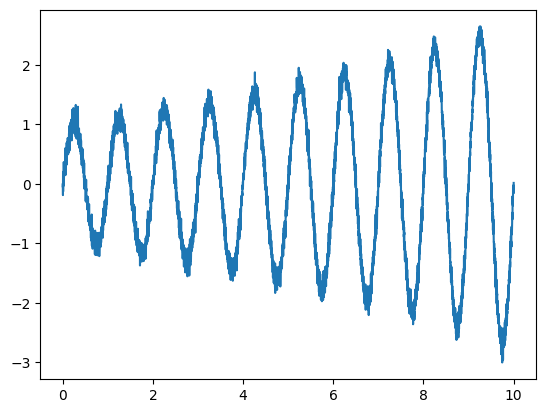

In [32]:
x = np.linspace(0,10,5000)
y = np.exp(x/10)*np.sin(2*np.pi*x)
y += np.random.normal(0,0.1,5000)
plt.plot(x,y)

In [33]:
arr = np.array([x] + [y])
df3 = pd.DataFrame(arr.T)
df3.columns=["x","y"]
df3.head()

,x,y
0,0.000000,-0.041676
1,0.002000,0.006944
2,0.004001,-0.188474
3,0.006001,0.201747
4,0.008002,-0.129049


In [34]:
df3.to_csv("data/exp_sin_reg.csv",index=False)

### Testing

In [56]:
df3_test = pd.read_pickle("data/scott-atkinson_20250724_Y0AT/X_test_scott-atkinson_20250724_Y0AT.pkl")
y_hat_file = 'data/scott-atkinson_20250724_Y0AT/y_hat_scott-atkinson_20250724_Y0AT.npy'
y_hat = np.load(y_hat_file)
df3_test["y_hat"] = y_hat
df3_test.head()

,x,y_hat
0,0.000000,0.228877
1,0.002000,0.235966
10,0.020004,0.303797
16,0.032006,0.349086
19,0.038008,0.371730


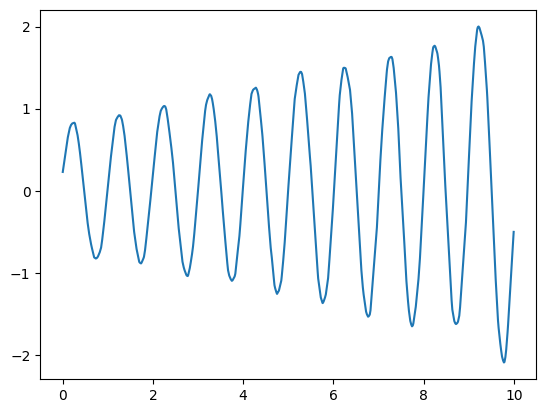

In [57]:
plt.plot(df3_test['x'],df3_test['y_hat'])

In [58]:
df3_test = df3_test.merge(df3[["y"]], left_index=True, right_index=True)

In [59]:
df3_test.head()

,x,y_hat,y
0,0.000000,0.228877,-0.041676
1,0.002000,0.235966,0.006944
10,0.020004,0.303797,0.180755
16,0.032006,0.349086,0.198477
19,0.038008,0.371730,0.238349


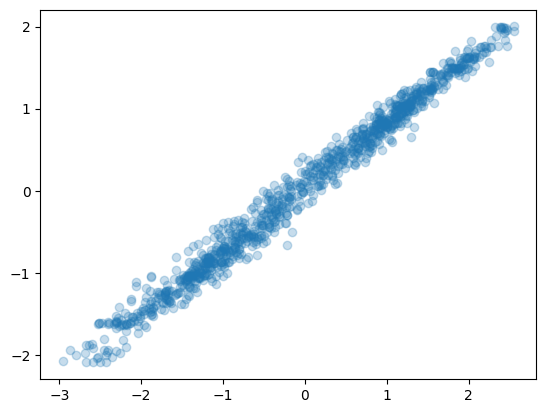

In [60]:
plt.scatter(df3_test["y"],df3_test["y_hat"], alpha=0.25)